# Graficación de mallas de Fronteras de Decisión

Ayuda a visualizar que el modelo <strong>no esté demasiado ajustado o demasiado sesgado</strong>, es decir, ayuda a visualizar el overfitting y el underfitting, según el caso; con ello <strong>ajustar parámetros y equilibrar</strong> las predicciones. Cabe resaltar que el overfitting se da cuando el <strong>accuracy de entrenamiento está demasiado alto y el de testeo demasiado bajo</strong>, caso distinto el <strong>underfitting donde testeo y entrenamiento están demasiado bajos</strong>; la idea es buscar modelos equilibrados y con buen accuracy en ambos parámetros.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification    # Solamente para crear datasets de pruebas
from sklearn.neighbors import KNeighborsClassifier  # Usa los K vecinos para clasificar un dato predominante, comparando los datos
from sklearn.linear_model import LogisticRegression

## Ejemplo con clasificador de K Neighbors

In [16]:
# Dataset de prueba
x, y = make_classification(
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    n_samples=100,
    random_state=7,
)

# Entrenamiento
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x, y)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [31]:
# Rango de la malla (grid) a crear
x_min, x_max = x[:,0].min() -1, x[:,0].max() +1
y_min, y_max = x[:,1].min() -1, x[:,1].max() +1 

# Malla (grid)
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),     # Malla de n * n entre min y max (se puede ajustar para mejorar visualización o rendimiento)
    np.linspace(y_min, y_max, 200),
)

In [32]:
# Predicción de los pts del grid
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

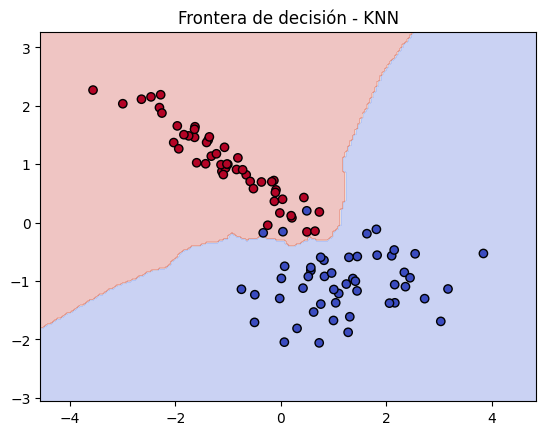

In [33]:
# Gráfico de Frontera de Decisiones
plt.contourf(xx, yy, z, alpha=.3, cmap="coolwarm")
plt.scatter(x[:,0], x[:,1], c=y, edgecolors="k", cmap="coolwarm")
plt.title("Frontera de decisión - KNN")
plt.show()

## Ejemplo con Regresión Logística

In [39]:
# Dataset de prueba
x, y = make_classification(
    n_clusters_per_class=1,
    n_features=2,
    n_informative=1,
    n_samples=100,
    n_redundant=0,
    random_state=7,
)

# Creación del modelo de regresión logística
lr = LogisticRegression()
lr.fit(x, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [43]:
# Asignación de rango min y max
x_min, x_max = x[:,0].min() -1, x[:,0].max() +1
y_min, y_max = x[:,1].min() -1, x[:,1].max() +1

# Creación de la malla
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 100),
    np.linspace(y_min, y_max, 100),
)

In [44]:
# Predicción de malla
z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

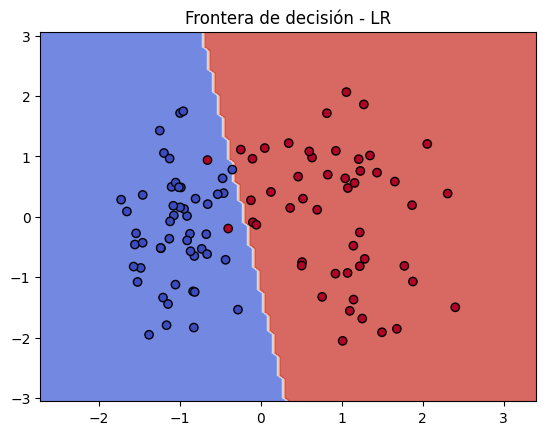

In [45]:
# Graficación de fronteras
plt.contourf(xx, yy, z, alpha=.8, cmap="coolwarm")
plt.scatter(x[:,0], x[:,1], c=y, edgecolors="k", cmap="coolwarm")
plt.title("Frontera de decisión - LR")
plt.show()